In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import datetime
import statsmodels.tsa.api as smt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import plotly.graph_objects as go

# Load and View Data

In [98]:
#contains the code to read in and process the dataset
def load_data():  
    return pd.read_csv("sales_data_sample.csv" ,encoding='latin1')  

sales_data_sample = load_data()

In [99]:
# prints information about the DataFrame
sales_data_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [100]:
#returns the number of missing values in the data set.
sales_data_sample.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [101]:
# return top n (5 by default) rows of a dataframe.
sales_data_sample.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05/07/2003 00:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07/01/2003 00:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 00:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [102]:
def monthly_sales(data):
    monthly_data = data.copy()
#     monthly_data.date = monthly_data.date.apply(lambda x: str(x)[:-3])
#     monthly_data = monthly_data.groupby('date')['sales'].sum().reset_index()
#     monthly_data.date = pd.to_datetime(monthly_data.date)
    return monthly_data

In [103]:
#displays the last five rows of the dataframe by default.
monthly_df = monthly_sales(sales_data_sample)
monthly_df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/02/2004 00:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,03/01/2005 00:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,05/06/2005 00:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [104]:
#Encode categorical features as a one-hot numeric array
label_encoder = preprocessing.LabelEncoder()
def ConvertToCategory(x):
    monthly_df[x]= label_encoder.fit_transform(monthly_df[x])
    
Feat=['STATUS','CITY','COUNTRY','TERRITORY','DEALSIZE']

for i in Feat:
    ConvertToCategory(i)
monthly_df.tail()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/02/2004 00:00,5,4,12,2004,...,"C/ Moralzarzal, 86",NaN,34,NaN,28034,14,1,Freyre,Diego,2
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,5,1,1,2005,...,Torikatu 38,NaN,51,NaN,90110,5,1,Koskitalo,Pirkko,1
2820,10386,43,100.00,4,5417.57,03/01/2005 00:00,4,1,3,2005,...,"C/ Moralzarzal, 86",NaN,34,NaN,28034,14,1,Freyre,Diego,1
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,5,1,3,2005,...,1 rue Alsace-Lorraine,NaN,68,NaN,31000,6,1,Roulet,Annette,2
2822,10414,47,65.52,9,3079.44,05/06/2005 00:00,3,2,5,2005,...,8616 Spinnaker Dr.,NaN,6,MA,51003,18,3,Yoshido,Juri,1


# Exploratory Data Analysis

In [105]:
compare1 = sales_data_sample.groupby(['PRODUCTLINE'])['QUANTITYORDERED'].sum().reset_index()
compare1

,PRODUCTLINE,QUANTITYORDERED
0,Classic Cars,33992
1,Motorcycles,11663
2,Planes,10727
3,Ships,8127
4,Trains,2712
5,Trucks and Buses,10777
6,Vintage Cars,21069


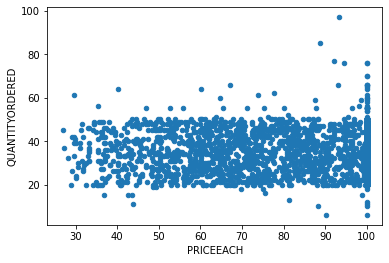

In [106]:
sales_data_sample.plot(kind='scatter', x='PRICEEACH', y='QUANTITYORDERED')
plt.show()

In [107]:
sales_data_sample.CITY.unique()

array(['NYC', 'Reims', 'Paris', 'Pasadena', 'San Francisco', 'Burlingame',
       'Lille', 'Bergen', 'Melbourne', 'Newark', 'Bridgewater', 'Nantes',
       'Cambridge', 'Helsinki', 'Stavern', 'Allentown', 'Salzburg',
       'Chatswood', 'New Bedford', 'Liverpool', 'Madrid', 'Lule',
       'Singapore', 'South Brisbane', 'Philadelphia', 'Lyon', 'Vancouver',
       'Burbank', 'New Haven', 'Minato-ku', 'Torino', 'Boras',
       'Versailles', 'San Rafael', 'Nashua', 'Brickhaven', 'North Sydney',
       'Montreal', 'Osaka', 'White Plains', 'Kobenhavn', 'London',
       'Toulouse', 'Barcelona', 'Los Angeles', 'San Diego', 'Bruxelles',
       'Tsawassen', 'Boston', 'Cowes', 'Oulu', 'San Jose', 'Graz',
       'Makati City', 'Marseille', 'Koln', 'Gensve', 'Reggio Emilia',
       'Frankfurt', 'Espoo', 'Dublin', 'Manchester', 'Aaarhus',
       'Glendale', 'Sevilla', 'Brisbane', 'Strasbourg', 'Las Vegas',
       'Oslo', 'Bergamo', 'Glen Waverly', 'Munich', 'Charleroi'],
      dtype=object)

In [108]:
top_city = sales_data_sample.groupby('CITY').sum()
top_city

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
CITY,,,,,,,,,
Aaarhus,276642,882,2378.21,198,100595.55,108,270,54096,2995
Allentown,319272,1111,2662.14,174,122138.14,100,263,62126,3304
Barcelona,235596,882,1919.63,142,78411.86,90,246,46077,2003
Bergamo,489268,1650,3752.69,412,137955.72,138,366,96158,4116
Bergen,295737,973,2556.66,199,111640.28,112,311,58091,3183
...,...,...,...,...,...,...,...,...,...
Toulouse,204529,687,1701.95,99,70488.44,62,168,40070,1943
Tsawassen,266782,873,2165.00,183,74634.85,66,160,52104,2242
Vancouver,225709,703,1895.80,132,75238.92,88,242,44077,2341


Text(99.0, 0.5, 'SALES')

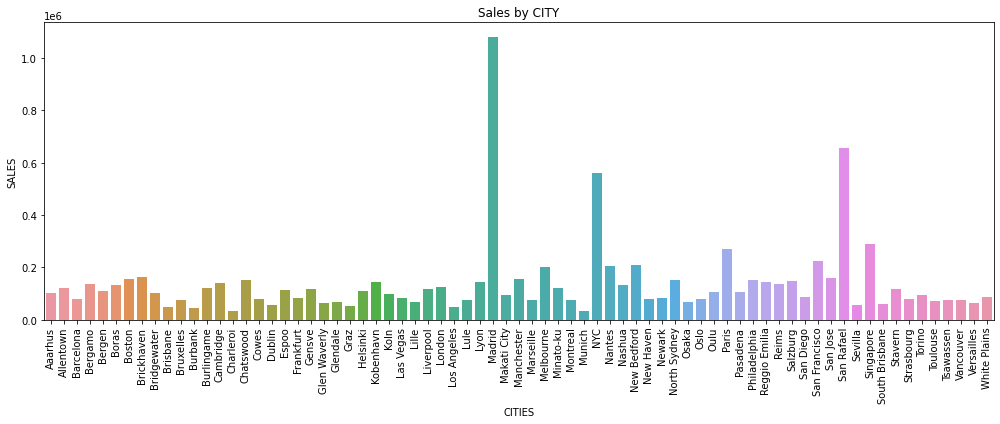

In [109]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Sales by CITY")

# Bar chart showing average sales in each month
sns.barplot(x=top_city.index, y=top_city.SALES)

plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel('CITIES')
plt.ylabel('SALES')

In [110]:
top_product_revenues = sales_data_sample.groupby(['PRODUCTLINE']).sum().sort_values('SALES', ascending = False)
top_product_revenues = top_product_revenues[['SALES']] 
top_product_revenues.head()

,SALES
PRODUCTLINE,
Classic Cars,3919615.66
Vintage Cars,1903150.84
Motorcycles,1166388.34
Trucks and Buses,1127789.84
Planes,975003.57


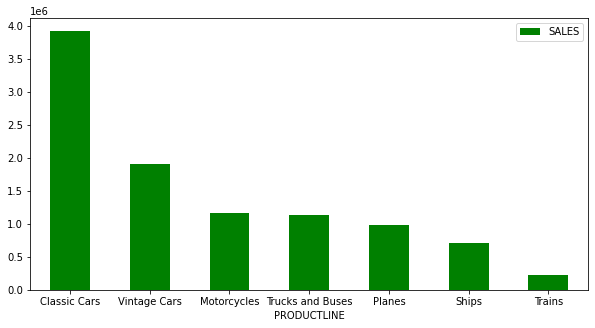

In [111]:
ax = top_product_revenues.plot.bar(figsize=(10,5),color= "green",rot=0)

In [112]:
top_product = sales_data_sample.groupby(['PRODUCTLINE']).sum().sort_values('SALES', ascending = False) #sort the categories as per the sales
top_product = top_product[['SALES']] #keep only the sales column in dataframe
top_product.reset_index(inplace = True) #reset index
top_product_revenues = top_product['SALES'].sum() #find the total revenue generated as per product line
top_product_revenues = str(int(top_product_revenues)) #convert the total revenue from float to int and then to string
top_product_revenues = top_product_revenues #adding '$' sign before the value

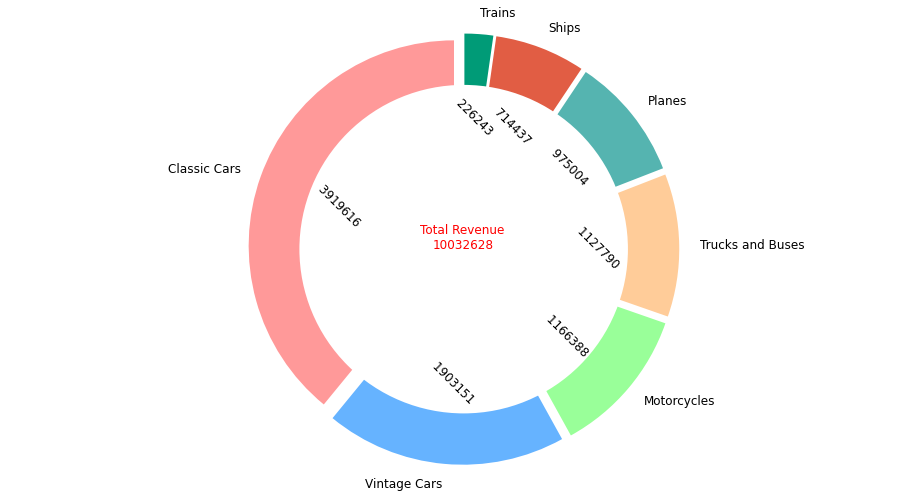

In [113]:
plt.rcParams['figure.figsize'] = (13,7)
plt.rcParams['font.size'] = 12.0 #font size is defined
plt.rcParams['font.weight'] = 6 #font weight is defined
# we don't want to look at the percentage distribution in the pie chart. Instead, we want to look at the exact revenue generated by the product line.
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return ' {v:d}'.format(v = val)
    return my_format
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#55B4B0','#E15D44','#009B77'] # Colors are defined for the pie chart
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
pie1 = ax1.pie(top_product['SALES'], colors = colors, labels = top_product['PRODUCTLINE'], autopct = autopct_format(top_product['SALES']), startangle = 90, explode = explode)
fraction_text_list = pie1[2]
for text in fraction_text_list:
    text.set_rotation(315)
center_circle = plt.Circle((0,0), 0.80, fc = 'white') # drawing a circle on the pie chart to make it look better 
fig = plt.gcf()
fig.gca().add_artist(center_circle)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
# we can look the total revenue generated by all the categories at the center
label = ax1.annotate('Total Revenue \n' + str(top_product_revenues), color = 'red', xy = (0,0), fontsize = 12, ha  ='center')
plt.tight_layout()
plt.show()

In [114]:
top_country = sales_data_sample.groupby(['COUNTRY']).sum().sort_values('SALES', ascending = False).head(10) 
top_country = top_country[['SALES']].round(3) 
top_country.reset_index(inplace = True) 
top_country.head()

,COUNTRY,SALES
0,USA,3627982.83
1,Spain,1215686.92
2,France,1110916.52
3,Australia,630623.10
4,UK,478880.46


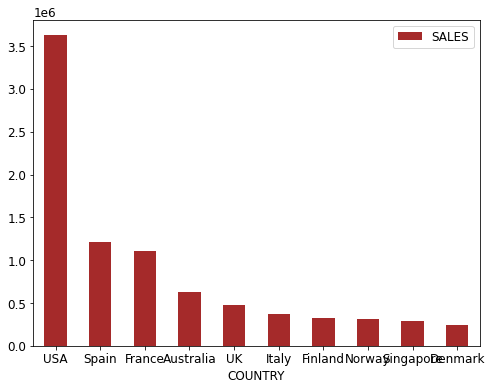

In [115]:
ax = top_country.plot.bar(x='COUNTRY', y='SALES',figsize=(8,6), color= "brown",rot=0)

In [116]:
sales_data_sample.DEALSIZE.unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [117]:
top_deal = sales_data_sample.groupby('DEALSIZE').sum()
top_deal

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
DEALSIZE,,,,,,,,,
Large,1612557,7414,15668.53,843,1302119.26,412,1063,314614,24835
Medium,14197054,52519,131980.65,8886,6087432.24,3765,9833,2773268,160335
Small,13150770,39134,88518.89,8525,2643077.35,3495,9126,2568888,99150


In [118]:
top_deal = sales_data_sample.groupby(['DEALSIZE']).sum().sort_values('SALES', ascending = False).head(10) 
top_deal = top_deal[['SALES']].round(3) 
top_deal.reset_index(inplace = True) 
top_deal.head()

,DEALSIZE,SALES
0,Medium,6087432.24
1,Small,2643077.35
2,Large,1302119.26


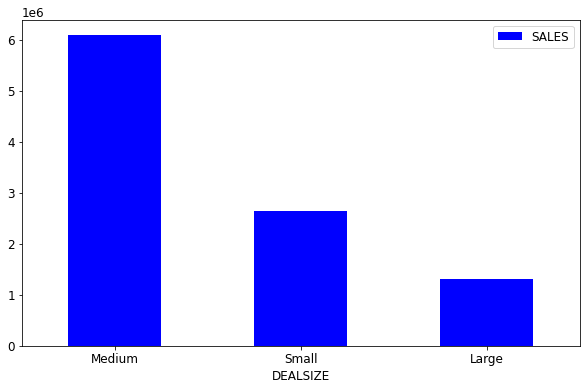

In [119]:
ax = top_deal.plot.bar(x='DEALSIZE', y='SALES',figsize=(10,6), color= "blue",rot=0)

In [120]:
deal = sales_data_sample.groupby(['COUNTRY', 'DEALSIZE'])['SALES'].count().reset_index()
deal.head()

,COUNTRY,DEALSIZE,SALES
0,Australia,Large,7
1,Australia,Medium,86
2,Australia,Small,92
3,Austria,Large,4
4,Austria,Medium,29


In [121]:
small = sales_data_sample.loc[sales_data_sample['DEALSIZE'] == 'Small'].count()[0]
small

1282

In [122]:
medium = sales_data_sample.loc[sales_data_sample['DEALSIZE'] == 'Medium'].count()[0]

In [123]:
large = sales_data_sample.loc[sales_data_sample['DEALSIZE'] == 'Large'].count()[0]

In [124]:
labels = ['Small', 'Medium', 'Large']
values = [small, medium, large]
colors = ['#E67E22 ','#FF00FF', '#CD5C5C']

figure = go.Figure(data=[go.Pie(labels=labels, values=values,
                               
                marker=dict(colors=colors),
                textinfo='label',
                textfont=dict(size=13),
                insidetextorientation='radial',
                           
)])

figure.show()

In [125]:
top_country = sales_data_sample.groupby(['TERRITORY']).sum().sort_values('SALES', ascending = False).head(10) 
top_country = top_country[['SALES']].round(3) 
top_country.reset_index(inplace = True) 
top_country.head()

,TERRITORY,SALES
0,EMEA,4979272.41
1,APAC,746121.83
2,Japan,455173.22


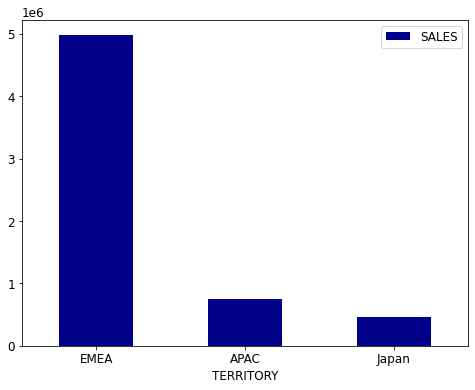

In [126]:
ax = top_country.plot.bar(x='TERRITORY', y='SALES',figsize=(8,6), color= "darkblue",rot=0)

In [127]:
compare4 = sales_data_sample.groupby(['DEALSIZE'])[['QUANTITYORDERED', 'SALES']].sum().reset_index()
compare4

,DEALSIZE,QUANTITYORDERED,SALES
0,Large,7414,1302119.26
1,Medium,52519,6087432.24
2,Small,39134,2643077.35


In [128]:
compare5 = sales_data_sample.groupby(['COUNTRY'])[['QUANTITYORDERED', 'SALES']].sum().reset_index()
compare5

,COUNTRY,QUANTITYORDERED,SALES
0,Australia,6246,630623.10
1,Austria,1974,202062.53
2,Belgium,1074,108412.62
3,Canada,2293,224078.56
4,Denmark,2197,245637.15
5,Finland,3192,329581.91
6,France,11090,1110916.52
7,Germany,2148,220472.09
8,Ireland,490,57756.43
9,Italy,3773,374674.31


In [129]:
compare6 = sales_data_sample.groupby(['TERRITORY'])[['QUANTITYORDERED', 'SALES']].sum().reset_index()
compare6

,TERRITORY,QUANTITYORDERED,SALES
0,APAC,7482,746121.83
1,EMEA,49306,4979272.41
2,Japan,4327,455173.22


In [130]:
compare7 = sales_data_sample.groupby(['STATUS'])[['QUANTITYORDERED', 'SALES']].sum().reset_index()
compare7

,STATUS,QUANTITYORDERED,SALES
0,Cancelled,2038,194487.48
1,Disputed,597,72212.86
2,In Process,1490,144729.96
3,On Hold,1879,178979.19
4,Resolved,1660,150718.28
5,Shipped,91403,9291501.08


In [131]:
compare8 = sales_data_sample.groupby('MSRP')['SALES'].mean().reset_index()
compare8

,MSRP,SALES
0,33,1919.243600
1,35,1686.981429
2,37,1722.811852
3,40,1654.137200
4,41,1508.257273
...,...,...
75,173,5589.693846
76,193,6553.887308
77,194,5487.080400
78,207,6484.050769


In [132]:
compare9 = sales_data_sample.groupby(['YEAR_ID'])[['SALES', 'QUANTITYORDERED']].sum().reset_index()
compare9.head()

,YEAR_ID,SALES,QUANTITYORDERED
0,2003,3516979.54,34612
1,2004,4724162.60,46824
2,2005,1791486.71,17631


array([[<AxesSubplot:title={'center':'ORDERNUMBER'}>,
        <AxesSubplot:title={'center':'QUANTITYORDERED'}>,
        <AxesSubplot:title={'center':'PRICEEACH'}>],
       [<AxesSubplot:title={'center':'ORDERLINENUMBER'}>,
        <AxesSubplot:title={'center':'SALES'}>,
        <AxesSubplot:title={'center':'QTR_ID'}>],
       [<AxesSubplot:title={'center':'MONTH_ID'}>,
        <AxesSubplot:title={'center':'YEAR_ID'}>,
        <AxesSubplot:title={'center':'MSRP'}>]], dtype=object)

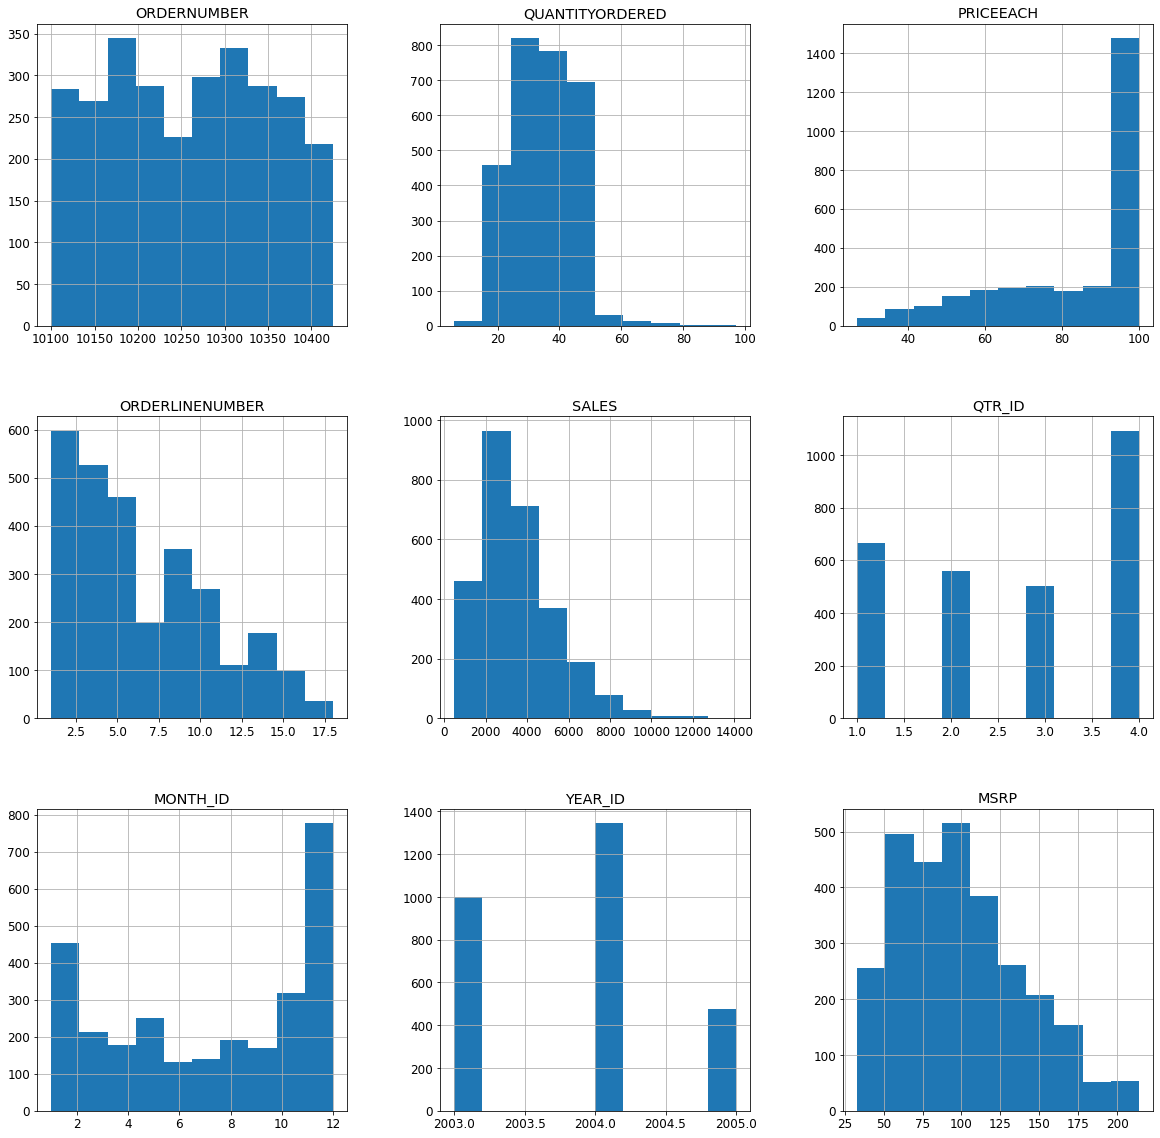

In [133]:
sales_data_sample.hist(figsize=(20,20))

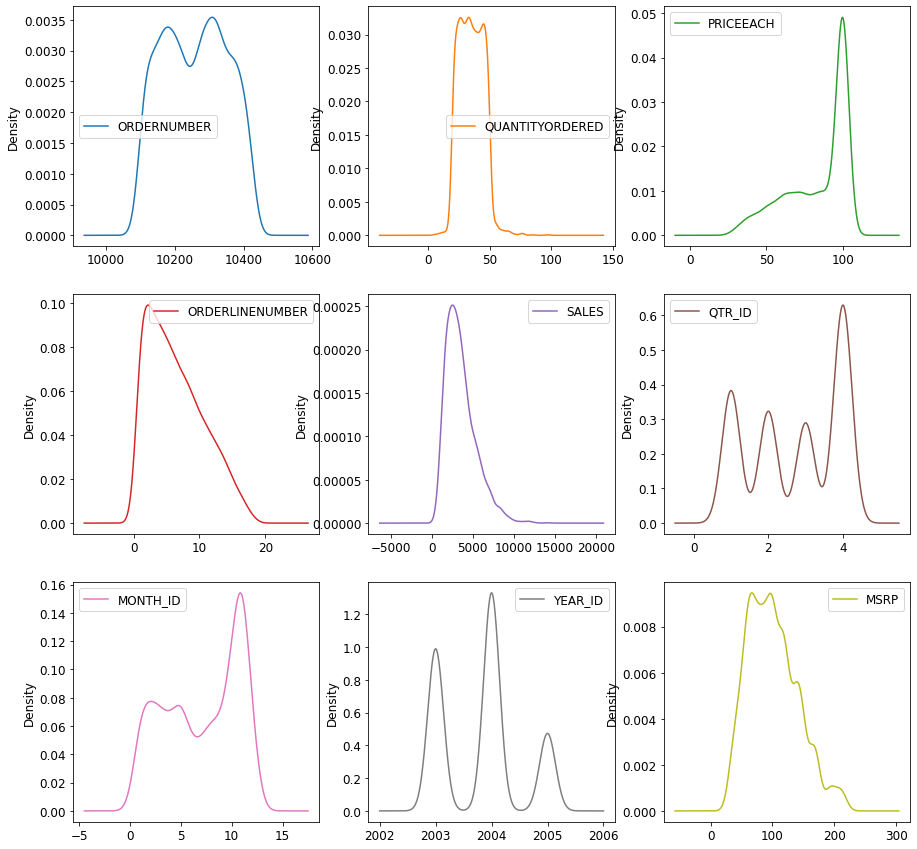

In [134]:
sales_data_sample.plot(kind='density', subplots=True, sharex=False, sharey=False, layout=(3,3),figsize=(15,15))
plt.show()

In [135]:
top_month = sales_data_sample.groupby('MONTH_ID').sum()
top_month

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,YEAR_ID,MSRP
MONTH_ID,,,,,,,,
1,2349698,7997,19111.78,1510,785874.44,229,458976,23081
2,2300254,7903,18902.49,1435,810441.90,224,448952,22680
3,2179852,7585,17432.61,1355,754501.39,212,424904,20883
4,1824713,6704,14763.28,965,669390.96,356,356710,17378
5,2595661,8992,21137.41,1555,923972.56,504,505070,25658
6,1337996,4620,10873.51,763,454756.78,262,262478,13001
7,1441499,4899,12105.77,905,514875.97,423,282514,14686
8,1955772,6538,15974.11,1426,659310.57,573,382706,19256
9,1749237,5681,14277.88,1026,584724.27,513,342608,17245


Text(0, 0.5, 'SALES')

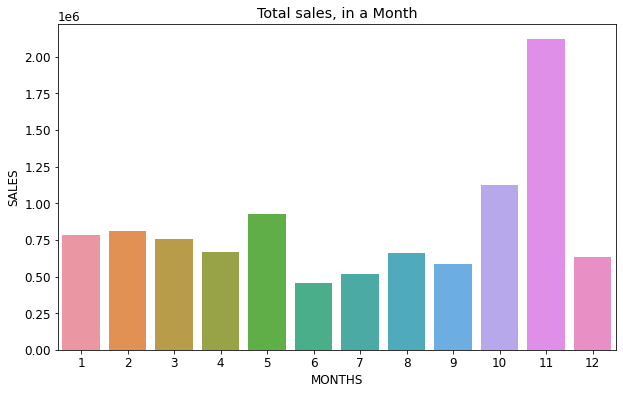

In [136]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Total sales, in a Month")

# Bar chart showing average sales in each month
sns.barplot(x=top_month.index, y=top_month.SALES)

plt.xlabel('MONTHS')
plt.ylabel('SALES')

In [137]:
top_product = sales_data_sample.groupby('PRODUCTLINE').sum().SALES
top_product

PRODUCTLINE
Classic Cars        3919615.66
Motorcycles         1166388.34
Planes               975003.57
Ships                714437.13
Trains               226243.47
Trucks and Buses    1127789.84
Vintage Cars        1903150.84
Name: SALES, dtype: float64

Text(96.0, 0.5, 'SALES')

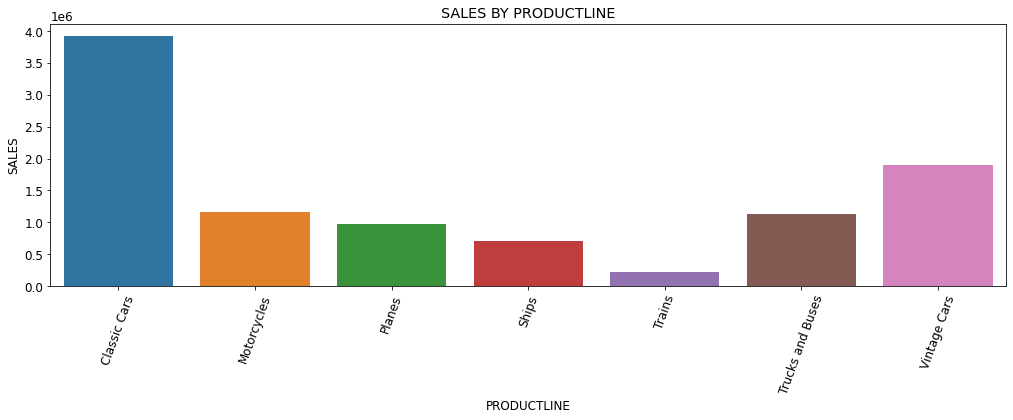

In [138]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("SALES BY PRODUCTLINE")

# Bar chart showing average sales in each month
sns.barplot(x=top_product.index, y=top_product.values)

plt.xticks(rotation=70)
plt.tight_layout()
plt.xlabel('PRODUCTLINE')
plt.ylabel('SALES')

Medium    1384
Small     1282
Large      157
Name: DEALSIZE, dtype: int64


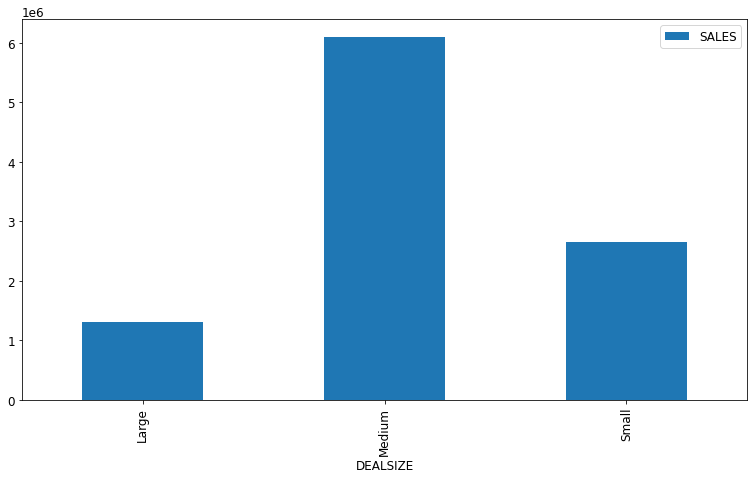

In [139]:
#print the deal size
print(sales_data_sample['DEALSIZE'].value_counts())

new_sales_data_sample = sales_data_sample.groupby('DEALSIZE').sum()
new_sales_data_sample.plot(kind='bar', y='SALES')
plt.show()

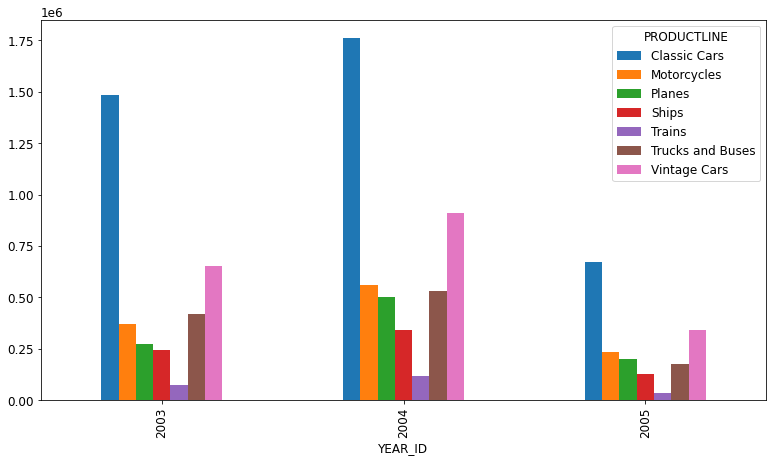

In [140]:
new_sales_data_sample = sales_data_sample.groupby(['YEAR_ID', 'PRODUCTLINE']).sum()

#display(new_df)
#display(new_df.unstack())

new_sales_data_sample.unstack().plot(kind='bar', y='SALES')
plt.show()

array([[<AxesSubplot:xlabel='SALES', ylabel='SALES'>,
        <AxesSubplot:xlabel='QUANTITYORDERED', ylabel='SALES'>,
        <AxesSubplot:xlabel='MSRP', ylabel='SALES'>],
       [<AxesSubplot:xlabel='SALES', ylabel='QUANTITYORDERED'>,
        <AxesSubplot:xlabel='QUANTITYORDERED', ylabel='QUANTITYORDERED'>,
        <AxesSubplot:xlabel='MSRP', ylabel='QUANTITYORDERED'>],
       [<AxesSubplot:xlabel='SALES', ylabel='MSRP'>,
        <AxesSubplot:xlabel='QUANTITYORDERED', ylabel='MSRP'>,
        <AxesSubplot:xlabel='MSRP', ylabel='MSRP'>]], dtype=object)

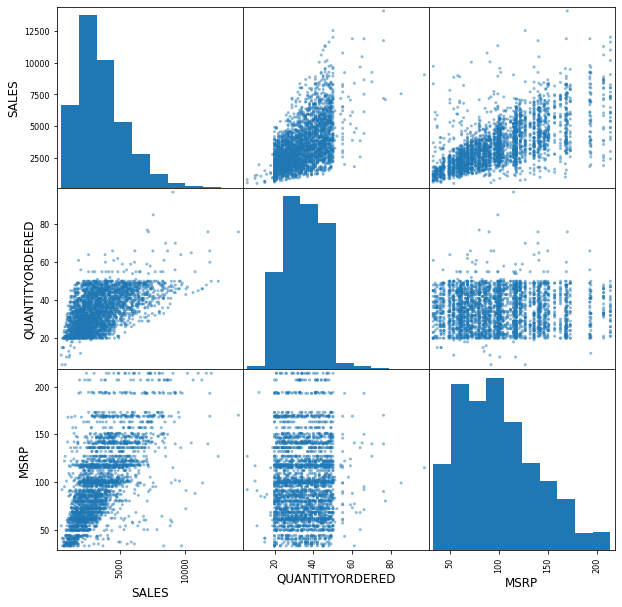

In [141]:
# Scatter plots are a handy way of looking at point and collective outliers. In this below code we choose only 3 columns that only make sense.
new_sales_data_sample = sales_data_sample = sales_data_sample[['SALES','QUANTITYORDERED','MSRP']]
pd.plotting.scatter_matrix(new_sales_data_sample, figsize = (10,10))

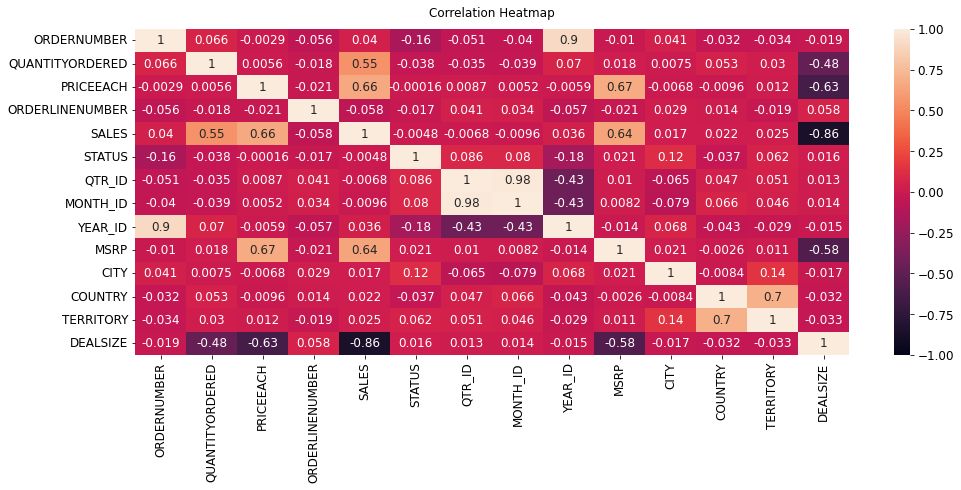

In [142]:
# Plotting a correlation matrix to see the overview of how the features are related to one another
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(monthly_df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<AxesSubplot:>

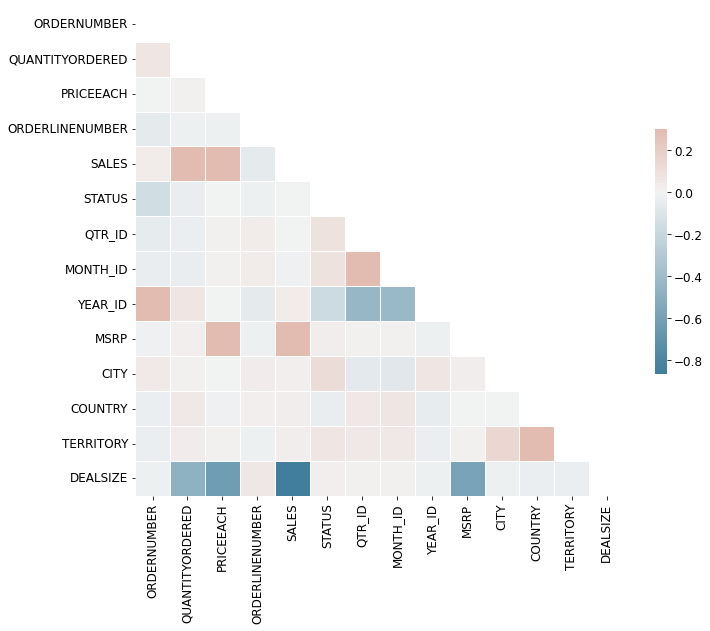

In [143]:
# Compute the correlation matrix
corr = monthly_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [144]:
y = monthly_df.SALES
monthly_df_features = ['PRICEEACH', 'STATUS', 'MONTH_ID', 'YEAR_ID', 'CITY', 'COUNTRY', 'TERRITORY', 'DEALSIZE']
x = monthly_df[monthly_df_features]

X_train, X_test, y_train, y_test = train_test_split(  x, y, test_size=0.33, random_state=42)

In [145]:
# Define model
melbourne_model = DecisionTreeRegressor(random_state=0)

# Fit model
melbourne_model.fit(X_train, y_train)

# get predicted errors on validation data
val_predictions = melbourne_model.predict(X_test)
MAE_D=mean_absolute_error(y_test, val_predictions)
print("Mean Absolute Error:\n")
print(MAE_D)
MSE_D = mean_squared_error(y_test, val_predictions)
print("Mean Square Error:\n")
print(MSE_D)
RMSE_D = math.sqrt(MSE_D)
print("Root Mean Square Error:\n")
print(RMSE_D)
rr_D=r2_score(y_test, val_predictions)
print("R Squared:\n")
print(rr_D)

Mean Absolute Error:

725.4671736041438
Mean Square Error:

1015097.5868998178
Root Mean Square Error:

1007.5205143816268
R Squared:

0.7352912689112685


In [146]:
# Define model
melbourne_model = LinearRegression()

# Fit model
melbourne_model.fit(X_train, y_train)

# get predicted errors on validation data
val_predictions = melbourne_model.predict(X_test)
MAE_L=mean_absolute_error(y_test, val_predictions)
print("Mean Absolute Error:\n")
print(MAE_L)
MSE_L = mean_squared_error(y_test, val_predictions)
print("Mean Square Error:\n")
print(MSE_L)
RMSE_L = math.sqrt(MSE_L)
print("Root Mean Square Error:\n")
print(RMSE_L)
rr_L=r2_score(y_test, val_predictions)
print("R Squared:\n")
print(rr_L)

Mean Absolute Error:

700.9046956766165
Mean Square Error:

910782.780349702
Root Mean Square Error:

954.3494016080808
R Squared:

0.7624936191404518


In [147]:
# Define model
xg_reg = xgb.XGBRegressor( learning_rate = 0.1, max_depth = 5, n_estimators = 500)

# Fit model
xg_reg.fit(X_train, y_train)

# get predicted errors on validation data
val_predictions = xg_reg.predict(X_test)
MAE_X=mean_absolute_error(y_test, val_predictions)
print("Mean Absolute Error:\n")
print(MAE_X)
MSE_X = mean_squared_error(y_test, val_predictions)
print("Mean Square Error:\n")
print(MSE_X)
RMSE_X = math.sqrt(MSE_X)
print("Root Mean Square Error:\n")
print(RMSE_X)
rr_X=r2_score(y_test, val_predictions)
print("R Squared:\n")
print(rr_X)

Mean Absolute Error:

647.4381711509606
Mean Square Error:

831552.1413139971
Root Mean Square Error:

911.8948082503799
R Squared:

0.783154728173864


In [148]:
# Define model
cls = RandomForestRegressor(n_estimators=500, max_depth=30)

# Fit model
cls.fit(X_train, y_train)

# get predicted errors on validation data
val_predictions = cls.predict(X_test)
MAE_R=mean_absolute_error(y_test, val_predictions)
print("Mean Absolute Error:\n")
print(MAE_R)
MSE_R = mean_squared_error(y_test, val_predictions)
print("Mean Square Error:\n")
print(MSE_R)
RMSE_R = math.sqrt(MSE_R)
print("Root Mean Square Error:\n")
print(RMSE_R)
rr_R=r2_score(y_test, val_predictions)
print("R Squared:\n")
print(rr_R)

Mean Absolute Error:

625.6801169138854
Mean Square Error:

805392.667245146
Root Mean Square Error:

897.4367204684384
R Squared:

0.7899763788960005


In [149]:
# def create_res():
    
#     results_dict={    }
#     results_dict[RMSE]={78}
#     results_dict[MSE]={bin: 1, hex: 2, oct: 3}
#     results_dict[RMSE]={bin: 1, hex: 2, oct: 3}
#     restults_df = pd.DataFrame.from_dict(results_dict, orient='index', 
#                                         columns=['RMSE', 'MAE','R2'])
#     return restults_df


# results = create_res()
# results
# initialize data of lists.
data = {'RMSE':[RMSE_R, RMSE_X, RMSE_D, RMSE_L],
        'MAE':[MAE_R, MAE_X, MAE_D, MAE_L],
       'R2':[rr_R, rr_X, rr_D, rr_L],
       'MSE':[MSE_R, MSE_X, MSE_D, MSE_L]}
 
# Creates pandas DataFrame.
df = pd.DataFrame(data, index =['Random Forest',
                                'Xgboost',
                                'Decision Tree',
                                'Linear Regression'])
 
# print the data
df

,RMSE,MAE,R2,MSE
Random Forest,897.436720,625.680117,0.789976,8.053927e+05
Xgboost,911.894808,647.438171,0.783155,8.315521e+05
Decision Tree,1007.520514,725.467174,0.735291,1.015098e+06
Linear Regression,954.349402,700.904696,0.762494,9.107828e+05


C:\Users\chydo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\chydo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\chydo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



FileNotFoundError: [Errno 2] No such file or directory: '../model_output/compare_models.png'

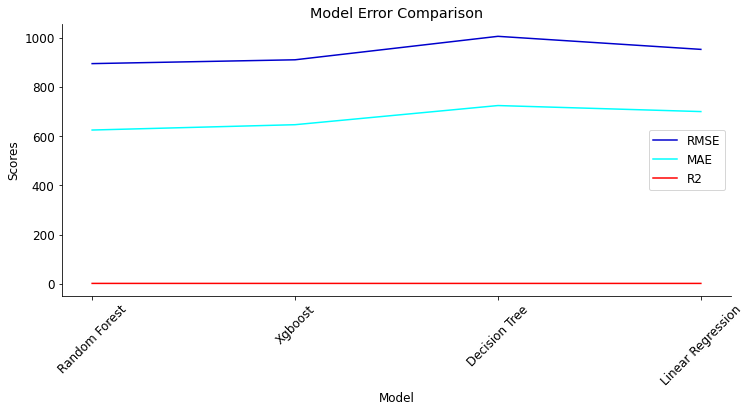

In [594]:
def plot_results(results_df):
    fig, ax = plt.subplots(figsize=(12, 5))
    sns.lineplot(np.arange(len(results_df)), 'RMSE', data=results_df, ax=ax, 
                 label='RMSE', color='mediumblue')
    sns.lineplot(np.arange(len(results_df)), 'MAE', data=results_df, ax=ax, 
                 label='MAE', color='Cyan')
    sns.lineplot(np.arange(len(results_df)), 'R2', data=results_df, ax=ax, 
                 label='R2', color='red')
   
    
    plt.xticks(np.arange(len(results_df)),rotation=45)
    ax.set_xticklabels(['Random Forest','Xgboost','Decision Tree', 'Linear Regression'])
    ax.set(xlabel = "Model",
           ylabel = "Scores",
           title = "Model Error Comparison")
    sns.despine()
    
    plt.savefig(f'../model_output/compare_models.png')

plot_results(df)